## Elman Network (RNN)

[Finding structure in time](http://psych.colorado.edu/~kimlab/Elman1990.pdf) (1990)

In [113]:
import random

import numpy as np
import matplotlib.pyplot as plt

In [114]:
# np.random.seed(123)

In [115]:
def sigmoid(x): 
    return 1 / (1 + np.exp(-x))

def sigmoid_backward(sx):
    return sx * (1 - sx)

In [116]:
def build_xor(z):
    n = [0, 0, 0], [1, 0, 1], [0, 1, 1], [1, 1, 1]
    
    xor = []
    for _ in range(z):
        idx = random.randint(0,3)
        xor.append(n[idx])
        
    return np.array(xor).flatten()

In [117]:
xor = build_xor(10)
print(xor)
print('Steps:', len(xor))

[0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1]
Steps: 30


In [118]:
# Define model - Encoding (Input), Hidden & Output
encoding_dim = 1
hidden_dim = 2
output_dim = 1

# Init weights & biases
w1 = np.random.random((hidden_dim + encoding_dim, hidden_dim))
w2 = np.random.random((hidden_dim, output_dim))

b1 = np.random.random((1, hidden_dim))
b2 = np.random.random((1, output_dim))

context = np.zeros([1, hidden_dim + encoding_dim]) + 0.5

In [119]:
epochs = len(xor)-1
lr = 0.3
loss = []

for i in range(epochs):

    context[:,2] = xor[i] # Add input to 3rd context

    # Forward pass
    hidden = sigmoid(context @ w1 + b1)
    logits = sigmoid(hidden @ w2 + b2)

    # Update context units
    context[:,0] = hidden.squeeze()[0]
    context[:,1] = hidden.squeeze()[1]

    y = np.array([xor[i+1]])

    # Backprop - Chain rule
    output_error = logits - y # Prediction error
    dL_dy = output_error * sigmoid_backward(logits) # Target dL_dt

    hidden_error = dL_dy @ w2.T # Layer 1 contribution to layer 2 error (according to weights)
    dL_dw = hidden_error * sigmoid_backward(hidden) # Hidden dL_dt

    # Update weights & biases - Delta rule
    w2 -= lr * (hidden.T @ dL_dy)
    b2 -= lr * np.sum(dL_dy, axis=0, keepdims=True)
    
    w1 -= lr * (context.T @ dL_dw)
    b1 -= lr * np.sum(dL_dw, axis=0, keepdims=True)

    loss.append(abs(sum(output_error)/len(y))) # Callback error

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss'))

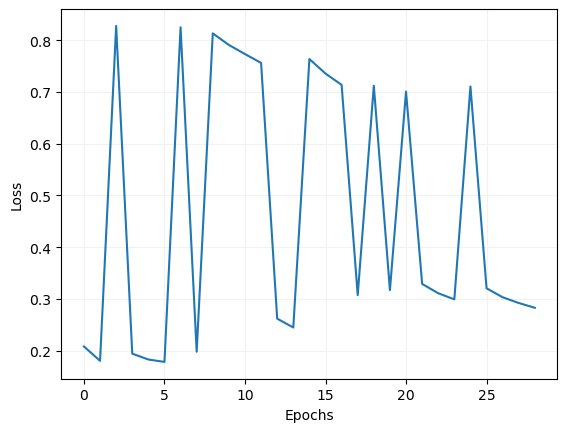

In [120]:
plt.plot(loss)
plt.grid(axis='both', color='0.95')
plt.xlabel('Epochs'), plt.ylabel('Loss')